In [8]:
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Pitch, Sbopen, VerticalPitch

In [9]:
#lets get the data
parser = Sbopen()
parser

In [4]:
parser = Sbopen()
df, related, freeze, tactics = parser.event(69301)
#get team names
team1, team2 = df.team_name.unique()
#A dataframe of shots
shots = df.loc[df['type_name'] == 'Shot'].set_index('id')

In [ ]:
pitch = Pitch(line_color = "black")
fig, ax = pitch.draw(figsize=(10, 7))
#Size of the pitch in yards (!!!)
pitchLengthX = 120
pitchWidthY = 80
#Plot the shots by looping through them.
for i,shot in shots.iterrows():
    #get the information
    x=shot['x']
    y=shot['y']
    goal=shot['outcome_name']=='Goal'
    team_name=shot['team_name']
    #set circlesize
    circleSize=2
    #plot England
    if (team_name==team1):
        if goal:
            shotCircle=plt.Circle((x,y),circleSize,color="red")
            plt.text(x+1,y-2,shot['player_name'])
        else:
            shotCircle=plt.Circle((x,y),circleSize,color="red")
            shotCircle.set_alpha(.2)
    #plot Sweden
    else:
        if goal:
            shotCircle=plt.Circle((pitchLengthX-x,pitchWidthY - y),circleSize,color="blue")
            plt.text(pitchLengthX-x+1,pitchWidthY - y - 2 ,shot['player_name'])
        else:
            shotCircle=plt.Circle((pitchLengthX-x,pitchWidthY - y),circleSize,color="blue")
            shotCircle.set_alpha(.2)
    ax.add_patch(shotCircle)
#set title
fig.suptitle("England (red) and Sweden (blue) shots", fontsize = 24)
fig.set_size_inches(10, 7)
plt.show()

In [ ]:
#create pitch
pitch = Pitch(line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#query
mask_england = (df.type_name == 'Shot') & (df.team_name == team1)
#finding rows in the df and keeping only necessary columns
df_england = df.loc[mask_england, ['x', 'y', 'outcome_name', "player_name"]]

#plot them - if shot ended with Goal - alpha 1 and add name
#for England
for i, row in df_england.iterrows():
    if row["outcome_name"] == 'Goal':
    #make circle
       pitch.scatter(row.x, row.y, alpha = 1, s = 500, color = "red", ax=ax['pitch'])
       pitch.annotate(row["player_name"], (row.x + 1, row.y - 2), ax=ax['pitch'], fontsize = 12)
    else:
       pitch.scatter(row.x, row.y, alpha = 0.2, s = 500, color = "red", ax=ax['pitch'])

mask_sweden = (df.type_name == 'Shot') & (df.team_name == team2)
df_sweden = df.loc[mask_sweden, ['x', 'y', 'outcome_name', "player_name"]]

#for Sweden we need to revert coordinates
for i, row in df_sweden.iterrows():
    if row["outcome_name"] == 'Goal':
       pitch.scatter(120 - row.x, 80 - row.y, alpha = 1, s = 500, color = "blue", ax=ax['pitch'])
       pitch.annotate(row["player_name"], (120 - row.x + 1, 80 - row.y - 2), ax=ax['pitch'], fontsize = 12)
    else:
       pitch.scatter(120 - row.x, 80 - row.y, alpha = 0.2, s = 500, color = "blue", ax=ax['pitch'])

fig.suptitle("England (red) and Sweden (blue) shots", fontsize = 30)
plt.show()

In [ ]:
pitch = VerticalPitch(line_color='black', half = True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#plotting all shots
pitch.scatter(df_england.x, df_england.y, alpha = 1, s = 500, color = "red", ax=ax['pitch'], edgecolors="black")
fig.suptitle("England shots against Sweden", fontsize = 30)
plt.show()

In [52]:
#lets try code one of all the passes in the match
#lets get all passes from, england
parser = Sbopen()
df, related, freeze, tactics = parser.event(69301)
#get team names
#team1, team2 = df.team_name.unique()
#A dataframe of shots
#shots = df.loc[df['type_name'] == 'Shot'].set_index('id')
#df['type_name'].unique()
passes = df.loc[df['type_name'] == 'Pass']
passes_eng = passes.loc[passes['team_name'] == "England Women's"]
passes_eng.columns
#passes['team_name'].unique()

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'match_id', 'type_id', 'type_name', 'possession_team_id',
       'possession_team_name', 'play_pattern_id', 'play_pattern_name',
       'team_id', 'team_name', 'tactics_formation', 'player_id', 'player_name',
       'position_id', 'position_name', 'pass_recipient_id',
       'pass_recipient_name', 'pass_length', 'pass_angle', 'pass_height_id',
       'pass_height_name', 'end_x', 'end_y', 'body_part_id', 'body_part_name',
       'sub_type_id', 'sub_type_name', 'x', 'y', 'under_pressure',
       'outcome_id', 'outcome_name', 'out', 'counterpress', 'pass_deflected',
       'pass_switch', 'technique_id', 'technique_name', 'pass_cross',
       'off_camera', 'shot_statsbomb_xg', 'end_z', 'shot_first_time',
       'goalkeeper_position_id', 'goalkeeper_position_name',
       'ball_recovery_recovery_failure', 'pass_assisted_shot_id',
       'pass_shot_assist', 'shot_key_pass_id', 'foul_won_defensiv

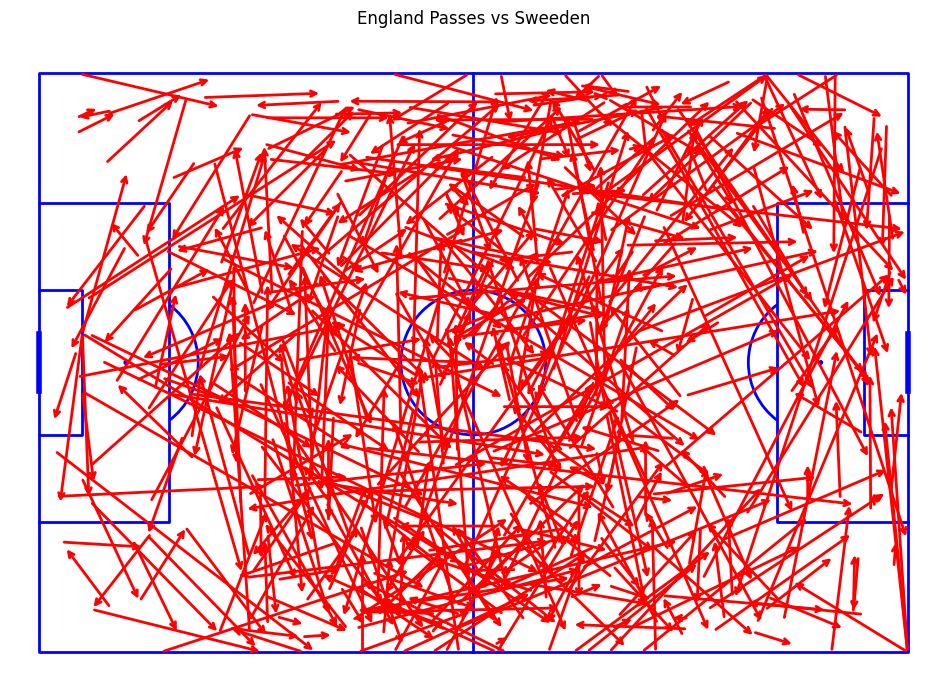

In [55]:
import matplotlib.patches as patches
#lets plot all of england passes left to right
pitch = Pitch(line_color='blue')
fig, ax = pitch.draw(figsize=(8, 4))
#lets keep only the neccsary rows
passes_eng_col = passes_eng[['type_name','sub_type_name','end_x', 'end_y', 'x', 'y','outcome_name']]

for i, row in passes_eng_col.iterrows():
    x = row['x']
    y = row['y']

    end_x = row['end_x']
    end_y = row['end_y']
    arrow = patches.FancyArrowPatch((x, y), (end_x, end_y),
                                arrowstyle='->',  # Style of the arrow
                                mutation_scale=10,  # Size of the arrowhead
                                color='red',  # Color of the arrow
                                linewidth=2)  # Thickness of the arrow
    ax.add_patch(arrow)
fig.suptitle("England Passes vs Sweeden")
fig.set_size_inches(10, 7)
plt.show()

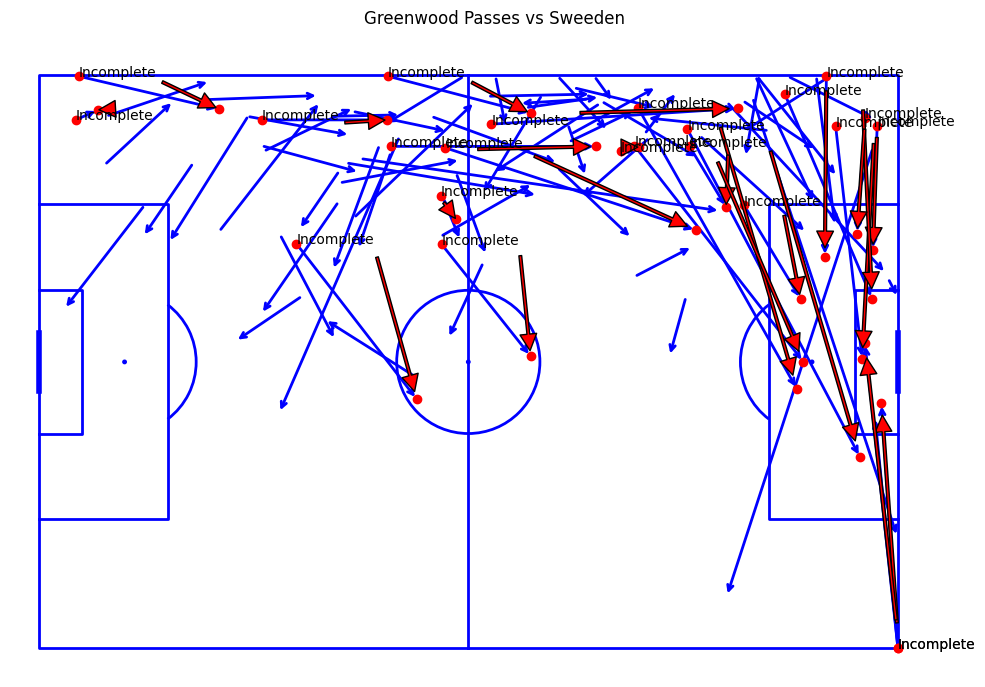

In [64]:
#Now lets do it for only a specific player (Leah <3) jk she didnt play lets do Alex Greenwood 'Alex Greenwood'
alex_passes = passes_eng.loc[passes_eng['player_name']== 'Alex Greenwood']
alex_passes = alex_passes[['type_name','sub_type_name','end_x', 'end_y', 'x', 'y','outcome_name']]
alex_passes
import matplotlib.patches as patches
#lets plot all of england passes left to right
pitch = Pitch(line_color='blue')
fig, ax = pitch.draw(figsize=(8, 4))
for i, row in alex_passes.iterrows():
    x = row['x']
    y = row['y']

    end_x = row['end_x']
    end_y = row['end_y']
    if row['outcome_name'] == 'Incomplete':
        ax.plot([x, end_x], [y, end_y], 'ro')  # 'ro' stands for red color and circle marker
        # Add an annotation with an arrow
        ax.annotate('Incomplete', xy=(end_x, end_y), xytext=(x, y),
            arrowprops=dict(facecolor='red', shrink=0.05, width=2))
        
    arrow = patches.FancyArrowPatch((x, y), (end_x, end_y),
                                arrowstyle='->',  # Style of the arrow
                                mutation_scale=10,  # Size of the arrowhead
                                color='blue',  # Color of the arrow
                                linewidth=2)  # Thickness of the arrow
    ax.add_patch(arrow)
fig.suptitle("Greenwood Passes vs Sweeden")
fig.set_size_inches(10, 7)
plt.show()

#above to fix need to subtract endx and endy from the original x and

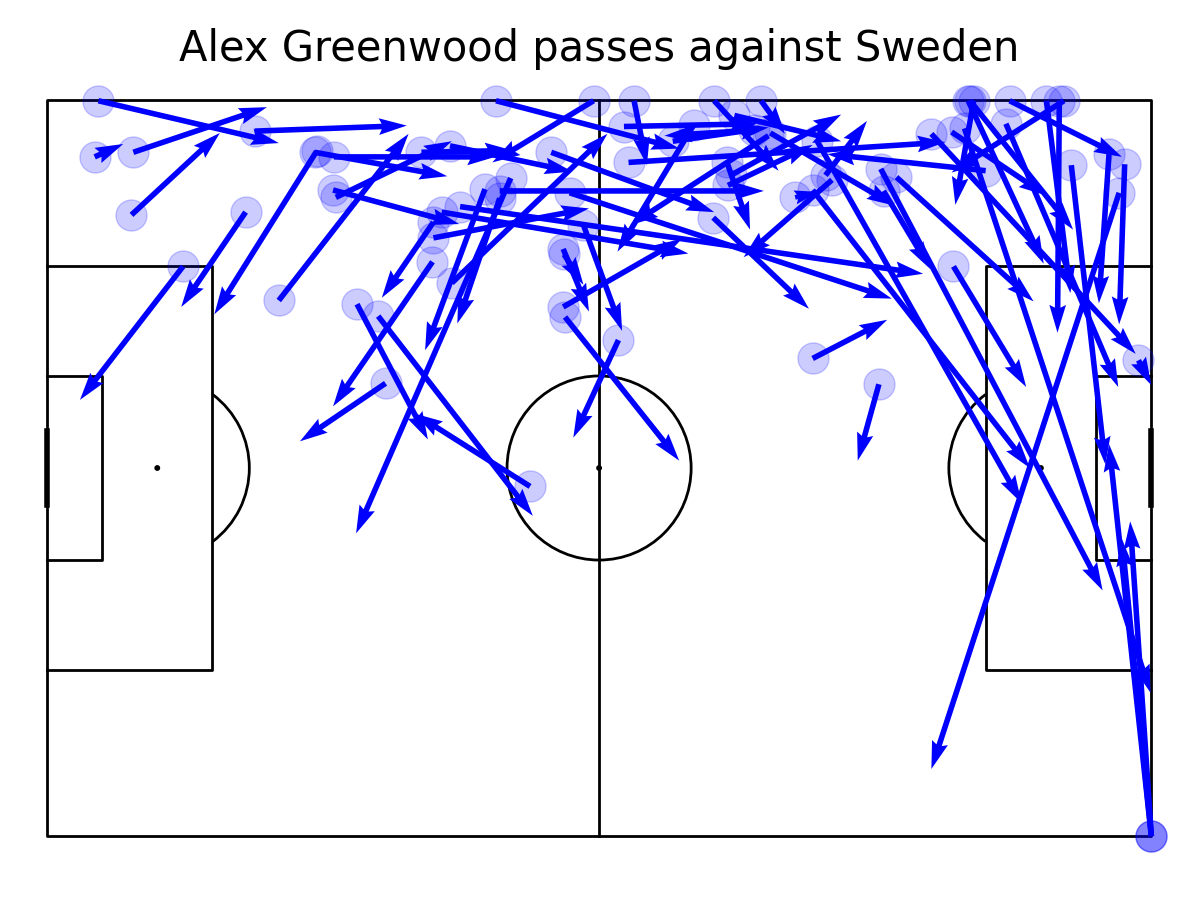

In [63]:
#change to greenwood
alex_grenwood = (df.type_name == 'Pass') & (df.player_name == 'Alex Greenwood')
df_pass = df.loc[alex_grenwood, ['x', 'y', 'end_x', 'end_y']]

pitch = Pitch(line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pitch.arrows(df_pass.x, df_pass.y,
            df_pass.end_x, df_pass.end_y, color = "blue", ax=ax['pitch'])
pitch.scatter(df_pass.x, df_pass.y, alpha = 0.2, s = 500, color = "blue", ax=ax['pitch'])
fig.suptitle("Alex Greenwood passes against Sweden", fontsize = 30)
plt.show()

In [59]:
#Plotting Passes section , above was a challenge

import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Pitch, Sbopen

parser = Sbopen()
df, related, freeze, tactics = parser.event(69301)
passes = df.loc[df['type_name'] == 'Pass'].loc[df['sub_type_name'] != 'Throw-in'].set_index('id')

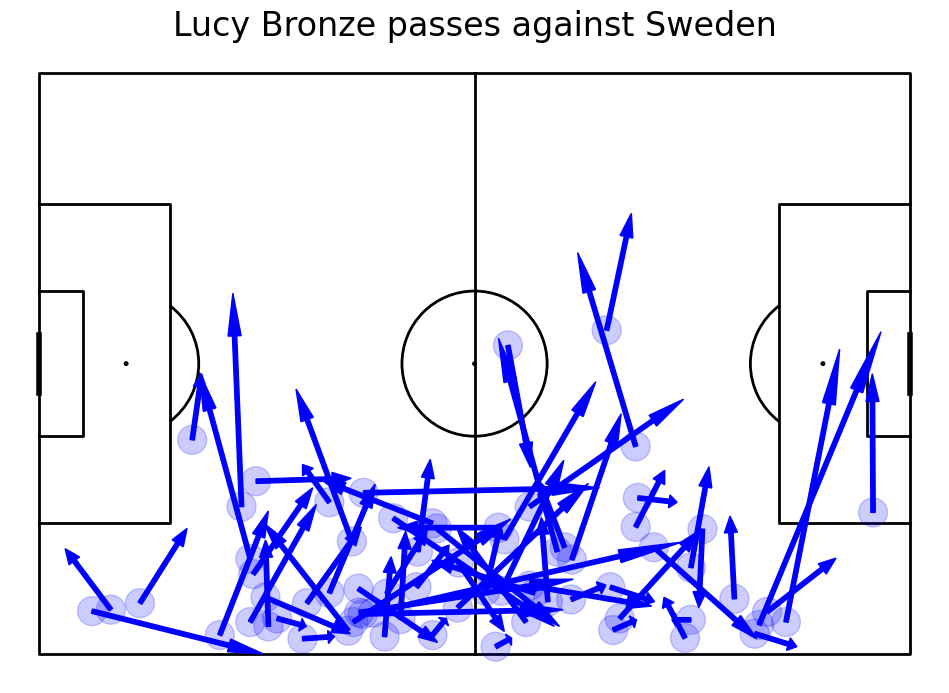

In [60]:
#drawing pitch
pitch = Pitch(line_color = "black")
fig, ax = pitch.draw(figsize=(10, 7))

for i,thepass in passes.iterrows():
    #if pass made by Lucy Bronze
    if thepass['player_name']=='Lucy Bronze':
        x=thepass['x']
        y=thepass['y']
        #plot circle
        passCircle=plt.Circle((x,y),2,color="blue")
        passCircle.set_alpha(.2)
        ax.add_patch(passCircle)
        dx=thepass['end_x']-x
        dy=thepass['end_y']-y
        #plot arrow
        passArrow=plt.Arrow(x,y,dx,dy,width=3,color="blue")
        ax.add_patch(passArrow)

ax.set_title("Lucy Bronze passes against Sweden", fontsize = 24)
fig.set_size_inches(10, 7)
plt.show()

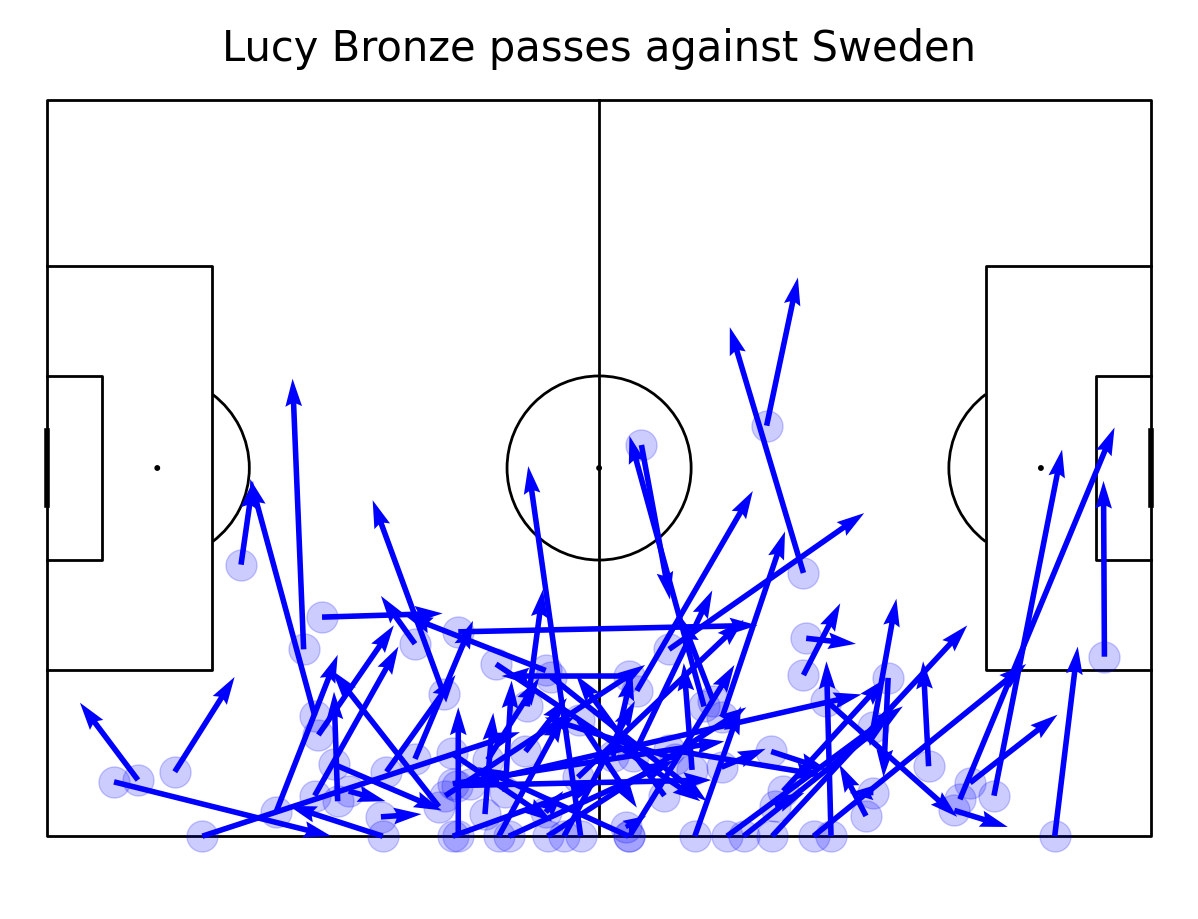

In [61]:
mask_bronze = (df.type_name == 'Pass') & (df.player_name == "Lucy Bronze")
df_pass = df.loc[mask_bronze, ['x', 'y', 'end_x', 'end_y']]

pitch = Pitch(line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pitch.arrows(df_pass.x, df_pass.y,
            df_pass.end_x, df_pass.end_y, color = "blue", ax=ax['pitch'])
pitch.scatter(df_pass.x, df_pass.y, alpha = 0.2, s = 500, color = "blue", ax=ax['pitch'])
fig.suptitle("Lucy Bronze passes against Sweden", fontsize = 30)
plt.show()

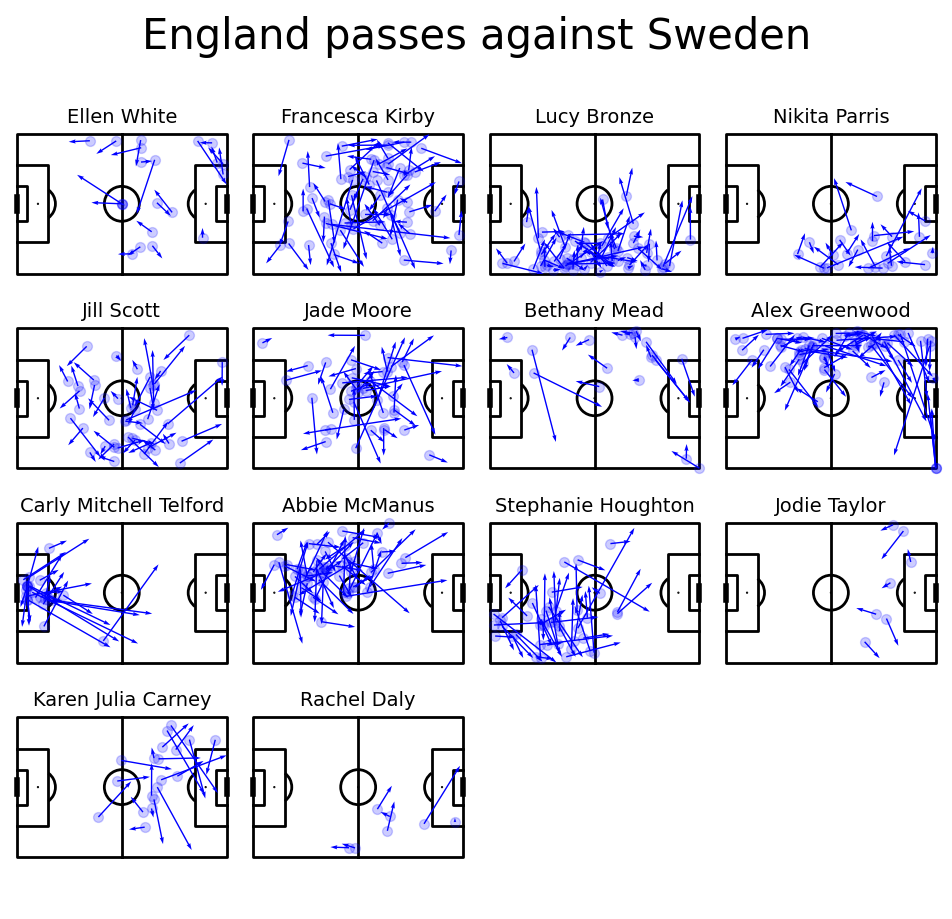

In [65]:
#prepare the dataframe of passes by England that were no-throw ins
mask_england = (df.type_name == 'Pass') & (df.team_name == "England Women's") & (df.sub_type_name != "Throw-in")
df_passes = df.loc[mask_england, ['x', 'y', 'end_x', 'end_y', 'player_name']]
#get the list of all players who made a pass
names = df_passes['player_name'].unique()

#draw 4x4 pitches
pitch = Pitch(line_color='black', pad_top=20)
fig, axs = pitch.grid(ncols = 4, nrows = 4, grid_height=0.85, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0.04, endnote_space=0.01)

#for each player
for name, ax in zip(names, axs['pitch'].flat[:len(names)]):
    #put player name over the plot
    ax.text(60, -10, name,
            ha='center', va='center', fontsize=14)
    #take only passes by this player
    player_df = df_passes.loc[df_passes["player_name"] == name]
    #scatter
    pitch.scatter(player_df.x, player_df.y, alpha = 0.2, s = 50, color = "blue", ax=ax)
    #plot arrow
    pitch.arrows(player_df.x, player_df.y,
            player_df.end_x, player_df.end_y, color = "blue", ax=ax, width=1)

#We have more than enough pitches - remove them
for ax in axs['pitch'][-1, 16 - len(names):]:
    ax.remove()

#Another way to set title using mplsoccer
axs['title'].text(0.5, 0.5, 'England passes against Sweden', ha='center', va='center', fontsize=30)
plt.show()

In [69]:
#Passing Networks
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Pitch, Sbopen
import pandas as pd

parser = Sbopen()
df, related, freeze, tactics = parser.event(69301)
df['index']

0          1
1          2
2          3
3          4
4          5
        ... 
3284    3285
3285    3286
3286    3287
3287    3288
3288    3289
Name: index, Length: 3289, dtype: int64

In [71]:
#check for index of first sub
sub = df.loc[df["type_name"] == "Substitution"].loc[df["team_name"] == "England Women's"].iloc[0]["index"]
#make df with successfull passes by England until the first substitution
mask_england = (df.type_name == 'Pass') & (df.team_name == "England Women's") & (df.index < sub) & (df.outcome_name.isnull()) & (df.sub_type_name != "Throw-in")
#taking necessary columns
df_pass = df.loc[mask_england, ['x', 'y', 'end_x', 'end_y', "player_name", "pass_recipient_name"]]
#adjusting that only the surname of a player is presented.
df_pass["player_name"] = df_pass["player_name"].apply(lambda x: str(x).split()[-1])
df_pass["pass_recipient_name"] = df_pass["pass_recipient_name"].apply(lambda x: str(x).split()[-1])

In [73]:
scatter_df = pd.DataFrame()
for i, name in enumerate(df_pass["player_name"].unique()):
    passx = df_pass.loc[df_pass["player_name"] == name]["x"].to_numpy()
    recx = df_pass.loc[df_pass["pass_recipient_name"] == name]["end_x"].to_numpy()
    passy = df_pass.loc[df_pass["player_name"] == name]["y"].to_numpy()
    recy = df_pass.loc[df_pass["pass_recipient_name"] == name]["end_y"].to_numpy()
    scatter_df.at[i, "player_name"] = name
    #make sure that x and y location for each circle representing the player is the average of passes and receptions
    scatter_df.at[i, "x"] = np.mean(np.concatenate([passx, recx]))
    scatter_df.at[i, "y"] = np.mean(np.concatenate([passy, recy]))
    #calculate number of passes
    scatter_df.at[i, "no"] = df_pass.loc[df_pass["player_name"] == name].count().iloc[0]

#adjust the size of a circle so that the player who made more passes
scatter_df['marker_size'] = (scatter_df['no'] / scatter_df['no'].max() * 1500)

In [74]:
#counting passes between players
df_pass["pair_key"] = df_pass.apply(lambda x: "_".join(sorted([x["player_name"], x["pass_recipient_name"]])), axis=1)
lines_df = df_pass.groupby(["pair_key"]).x.count().reset_index()
lines_df.rename({'x':'pass_count'}, axis='columns', inplace=True)
#setting a treshold. You can try to investigate how it changes when you change it.
lines_df = lines_df[lines_df['pass_count']>2]

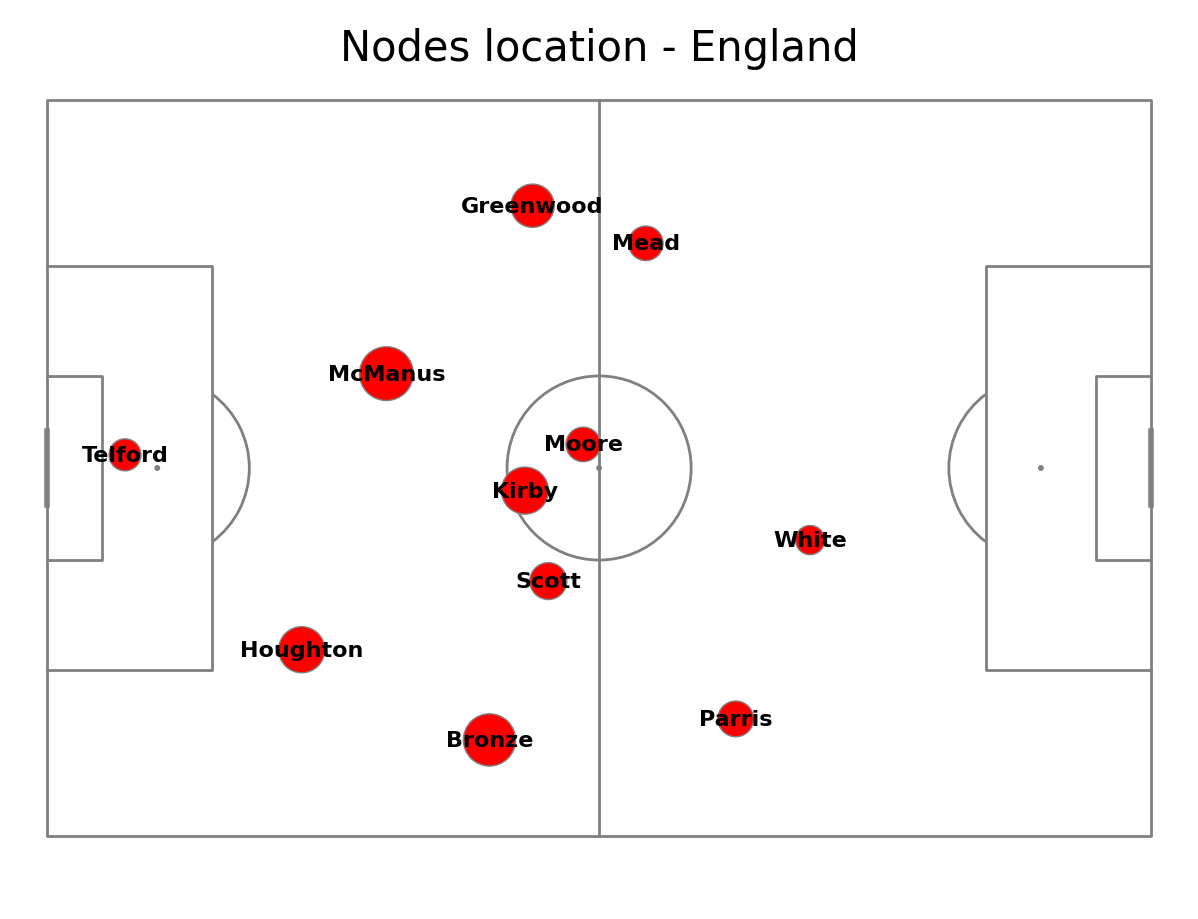

In [75]:
#Drawing pitch
pitch = Pitch(line_color='grey')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#Scatter the location on the pitch
pitch.scatter(scatter_df.x, scatter_df.y, s=scatter_df.marker_size, color='red', edgecolors='grey', linewidth=1, alpha=1, ax=ax["pitch"], zorder = 3)
#annotating player name
for i, row in scatter_df.iterrows():
    pitch.annotate(row.player_name, xy=(row.x, row.y), c='black', va='center', ha='center', weight = "bold", size=16, ax=ax["pitch"], zorder = 4)

fig.suptitle("Nodes location - England", fontsize = 30)
plt.show()

Text(0.5, 0.98, 'England Passing Network against Sweden')

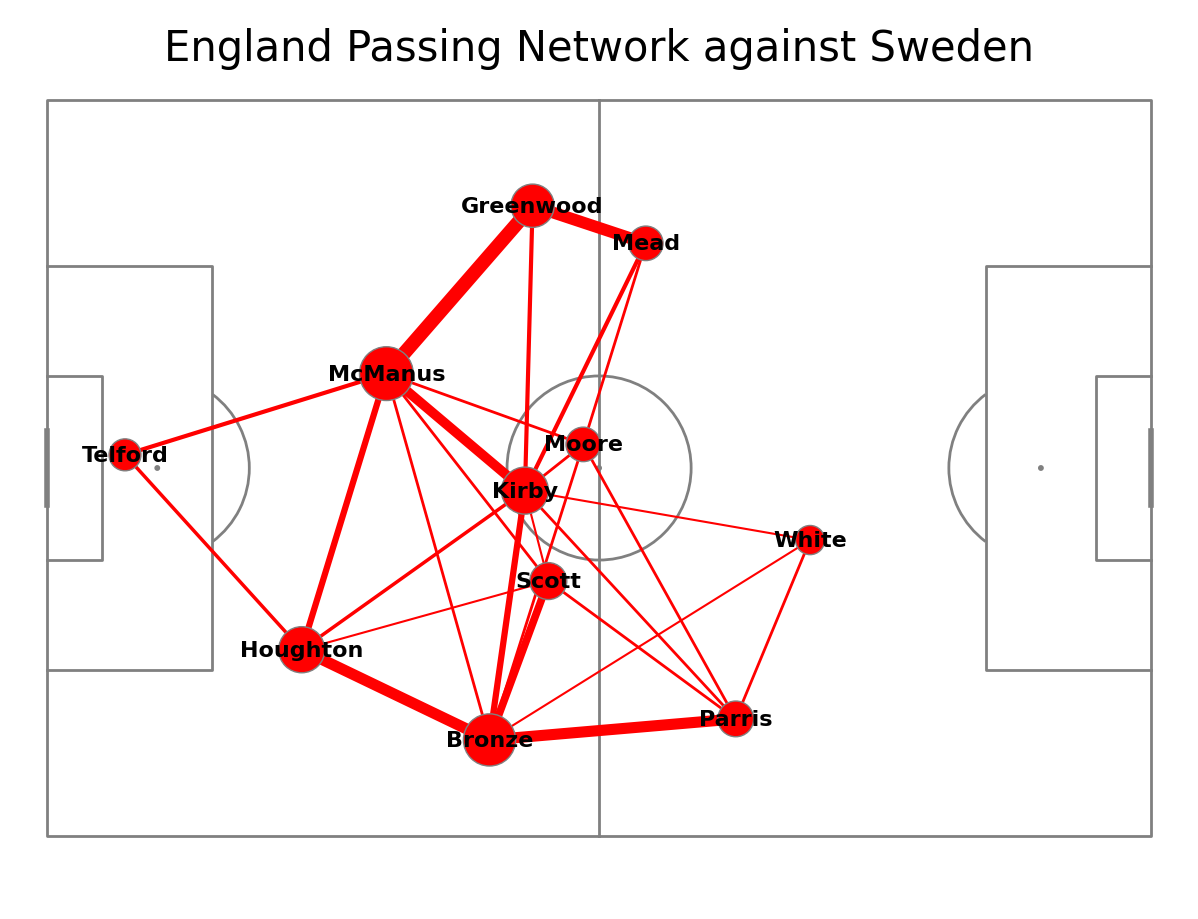

In [76]:
#plot once again pitch and vertices
pitch = Pitch(line_color='grey')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pitch.scatter(scatter_df.x, scatter_df.y, s=scatter_df.marker_size, color='red', edgecolors='grey', linewidth=1, alpha=1, ax=ax["pitch"], zorder = 3)
for i, row in scatter_df.iterrows():
    pitch.annotate(row.player_name, xy=(row.x, row.y), c='black', va='center', ha='center', weight = "bold", size=16, ax=ax["pitch"], zorder = 4)

for i, row in lines_df.iterrows():
        player1 = row["pair_key"].split("_")[0]
        player2 = row['pair_key'].split("_")[1]
        #take the average location of players to plot a line between them
        player1_x = scatter_df.loc[scatter_df["player_name"] == player1]['x'].iloc[0]
        player1_y = scatter_df.loc[scatter_df["player_name"] == player1]['y'].iloc[0]
        player2_x = scatter_df.loc[scatter_df["player_name"] == player2]['x'].iloc[0]
        player2_y = scatter_df.loc[scatter_df["player_name"] == player2]['y'].iloc[0]
        num_passes = row["pass_count"]
        #adjust the line width so that the more passes, the wider the line
        line_width = (num_passes / lines_df['pass_count'].max() * 10)
        #plot lines on the pitch
        pitch.lines(player1_x, player1_y, player2_x, player2_y,
                        alpha=1, lw=line_width, zorder=2, color="red", ax = ax["pitch"])

fig.suptitle("England Passing Network against Sweden", fontsize = 30)

In [77]:
#calculate number of successful passes by player
no_passes = df_pass.groupby(['player_name']).x.count().reset_index()
no_passes.rename({'x':'pass_count'}, axis='columns', inplace=True)
#find one who made most passes
max_no = no_passes["pass_count"].max()
#calculate the denominator - 10*the total sum of passes
denominator = 10*no_passes["pass_count"].sum()
#calculate the nominator
nominator = (max_no - no_passes["pass_count"]).sum()
#calculate the centralisation index
centralisation_index = nominator/denominator
print("Centralisation index is ", centralisation_index)

Centralisation index is  0.07
